# **NOTEBOOK DE LA PRIMERA CLASE CON EJERCICIOS REALIZADOS**

In [1]:
#Importar las librerias que se van a utilizar
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

La Red Automática de Monitoreo Atmosférico (RAMA) es el subsistema del Sistema de Monitoreo Atmosférico de la Ciudad de México (SIMAT) que realiza mediciones continuas y permanentes minuto a minuto de ozono (O3), dióxido de azufre (SO2), óxidos de nitrógeno (NOx), monóxido de carbono (CO), partículas menores a 10 micrómetros (PM10) y partículas menores a 2.5 micrómetros (PM2.5).

https://datos.cdmx.gob.mx/dataset/red-automatica-de-monitoreo-atmosferico


### 1. Leer los datos (RAMA) y mostrar las primeras 5 entradas


Repositorio: https://github.com/jamc88/Analisis-datos-atmosfericos


La concentración de un contaminante  se da en microgramos (una millonésima de gramo) por metro cúbico de aire $\mu$g/$m^3$.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")  #Lee los datos que llama del repositorio

In [3]:
df.head() #Muestra los primeros datos

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


In [4]:
df.tail() #Muestra los ultimos datos

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818
3072,2023-05-31,0.340404,5.353066,19.372583,25.710359,47.860972,42.203390,24.787097,1.402083


In [5]:
df.info() #Proporciona información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   3073 non-null   object 
 1   CO      3073 non-null   float64
 2   NO      3073 non-null   float64
 3   NO2     3073 non-null   float64
 4   NOX     3073 non-null   float64
 5   O3      3073 non-null   float64
 6   PM10    3073 non-null   float64
 7   PM25    3073 non-null   float64
 8   SO2     3073 non-null   float64
dtypes: float64(8), object(1)
memory usage: 216.2+ KB


In [6]:
df.columns #Muestra las columnas

Index(['fecha', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2'], dtype='object')

## Estadísticos Básicos

* La **media aritmética (o promedio)** de una muestra de $n$ mediciones  es igual a la suma de las mediciones dividida entre $n$.

$$
\overline{x}=\frac{1}{n}\sum_{i=1}^n x_i
$$

* La **mediana m**  de un conjunto de $n$ mediciones es el valor de $x$ que cae en la posición media cuando las mediciones son ordenadas de menor a mayor.

* La **varianza** de una muestra de $n$ mediciones es la suma de las desviaciones cuadradas de las mediciones alrededor la media $\overline{x}$ dividida entre $(n-1)$.  La varianza muestral se denota con $s^2$ y está dada por:
$$
s^2 = \frac{\sum_{i=1}^n (x_i-\overline{x})^2}{n-1}
$$

* La **desviación estándar** de un conjunto de mediciones es igual a la raíz cuadrada positiva de la varianza.

### **Ejercicio:** Calcular la media, mediana, varianza y desviación estándar para el CO

In [9]:
media=(df['CO'] .sum())/3072  #Calcula la media, sumando y dividiendo entre el total
#media= df['CO']. median()    Calcula la media con una función de python
media

0.4820829293961741

In [10]:
mediana=df['CO'].mean()  #Calcula la mediana
mediana

0.4819260524259833

In [11]:
varianza=df['CO'].var() #Calcula la varianza
varianza

0.04209907680387132

## Resumen de 5 numeros

El resumen de cinco números de un conjunto de datos consta del número más pequeño ($Min$), el cuartil inferior ($Q_1$), la mediana ($Q_2$), el cuartil superior ($Q_3$), y el número más grande ($Máx$), presentados en orden de menor a mayor.

Los cuantiles son puntos que dividen un conjunto de datos ordenados en partes iguales. De modo que un cuantil indica el valor por debajo del cual se encuentra un porcentaje de datos.

Por ejemplo, si el valor del cuantil de orden 0,39 es 24, significa que el 39% de los datos de la muestra son menores que 24 y que el resto de datos son mayores que 24.

Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);

### **Ejercicio:** Obtenga un resumen de 5 numeros para el ozono.

In [12]:
cuartil= df['O3'].quantile([.25, .50, .75]) #Muestra los cuartiles
cuartil

,O3
0.25,23.923077
0.50,29.838384
0.75,36.216012


In [14]:
descripcion=df['O3'].describe()  #Nos da la descripción de la calumna seleccionada
descripcion

,O3
count,3073.000000
mean,30.486331
std,9.023384
min,3.226054
25%,23.923077
50%,29.838384
75%,36.216012
max,67.443750


In [16]:
describetot=df.describe()  #Nos da la descripción de todo el DataFrame
describetot

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000
mean,0.481926,14.712425,23.030057,37.996908,30.486331,41.892833,21.327371,3.689885
std,0.205181,8.857507,6.754973,14.795599,9.023384,16.047342,8.796122,3.490277
min,0.115917,1.168000,8.061630,9.983402,3.226054,8.218487,2.849315,0.630435
25%,0.327215,8.018735,18.188498,26.938073,23.923077,29.483986,15.344720,1.557047
50%,0.444033,12.669596,22.421517,35.880223,29.838384,40.040856,20.550000,2.484034
75%,0.597009,19.386091,26.854167,46.739777,36.216012,52.708716,26.212963,4.377049
max,1.831818,75.806548,72.193452,148.005952,67.443750,115.334071,86.909910,31.461741


## Gráfica de caja

Un **valor atípico** (outlier) es una observación que es numéricamente distante del resto de los datos.

### **Ejercicio:** Obtenga una gráfica de caja para el dióxido de nitrógeno (NO2).

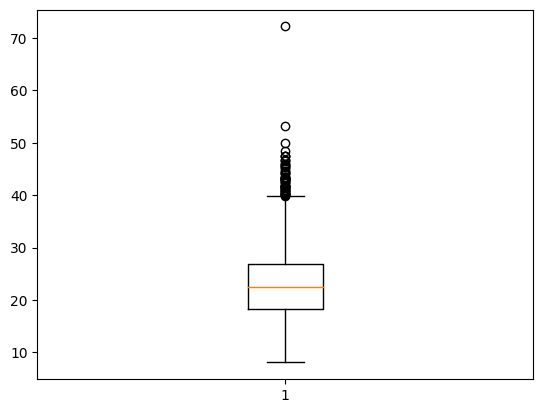

In [ ]:
plt.boxplot(df['NO2']) #Grafica de caja (para determinar los datos atipicos)
plt.show()

#vert = False

### **Ejercicio:** Obtenga las graficas de caja de las partículas PM10 y PM25.

In [17]:
import seaborn as sb #Importar la paqueteria

<Axes: >

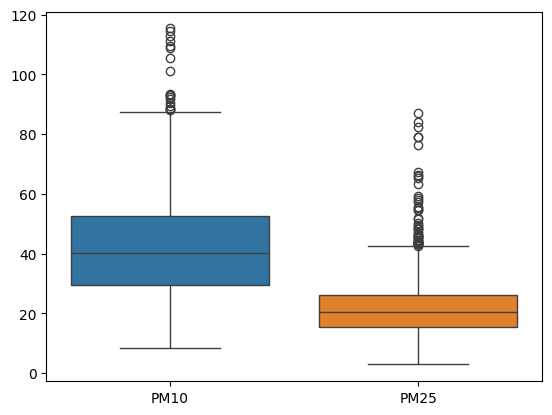

In [18]:
sb.boxplot(data=df[['PM10', 'PM25']]) #Grafica de caja para las columnas de PM10 y PM2.5

### **Ejercicio:** Obtenga las graficas de caja de todos los contaminantes.

<Axes: >

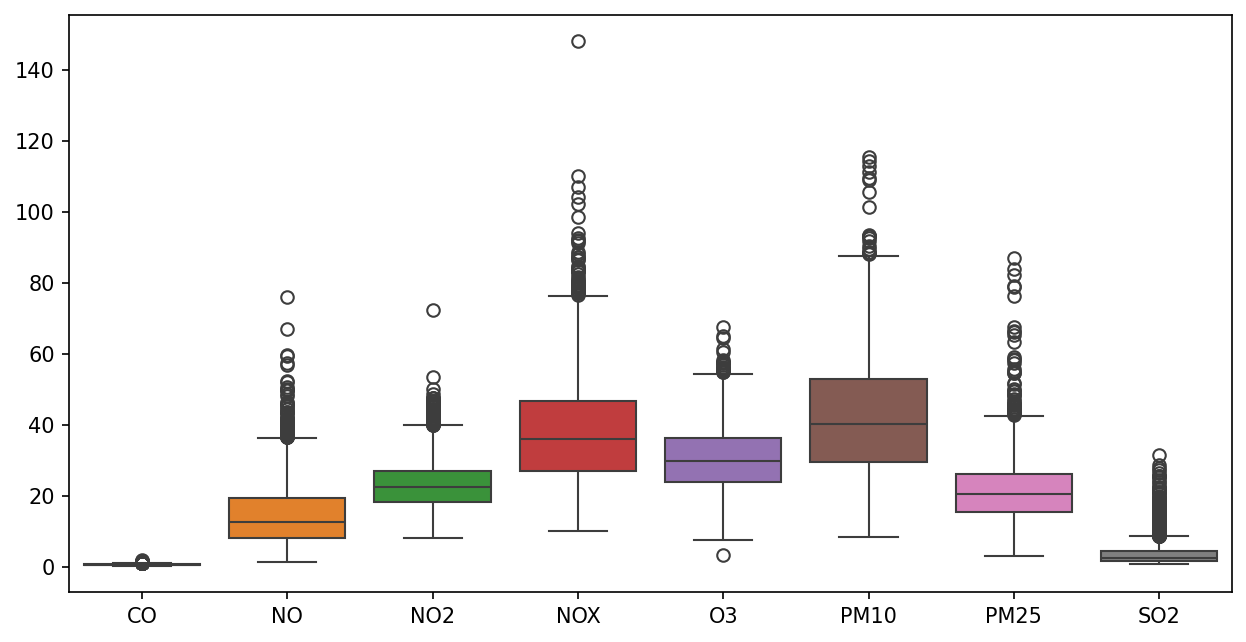

In [20]:
plt.figure(figsize=(10,5), dpi=150)
sb.boxplot(data=df)

#sb.boxplot(data=df)
# orient='h'
#plt.figure(figsize=(10,5), dpi=150)

**Ejercicio:** ¿Cuantos datos atípicos tienen los óxidos de nitrógeno?
Recordando que los datos atipicos se detectan mediante el límite inferior y el límite superior.

In [21]:
desc=(df['NOX']).describe() #Da la descripción de la columna
desc

,NOX
count,3073.000000
mean,37.996908
std,14.795599
min,9.983402
25%,26.938073
50%,35.880223
75%,46.739777
max,148.005952


In [23]:
IQR=46.739-26.938
datip=46.739+1.5*(IQR)
datos_atipicos= (df['NOX']>datip).sum()
datos_atipicos

50

In [24]:
porcentaje=50/3072*(100) #Porcenteje que representan los datoa atipicos
porcentaje

1.6276041666666667

**Ejercicio:** ¿En qué fechas se registraron estos datos atípicos?

In [27]:
fechas=df[['fecha', 'NOX']] [df['NOX']>datip]
fechas

,fecha,NOX
300,2015-10-28,83.483333
333,2015-11-30,87.296610
334,2015-12-01,98.563855
335,2015-12-02,83.168246
342,2015-12-09,84.654118
343,2015-12-10,86.292566
344,2015-12-11,91.745327
349,2015-12-16,78.567696
354,2015-12-21,80.957647
356,2015-12-23,102.088167


## Gráficas de los contaminantes

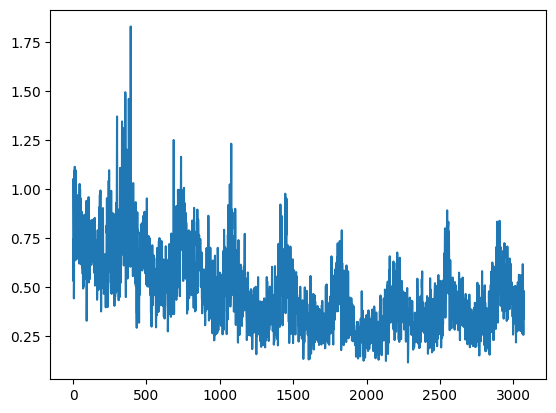

In [28]:
fig, ax = plt.subplots()  #Grafica la serie temporal
ax.plot(df['CO']);

## Serie temporal

Llamaremos **serie temporal ó serie de tiempo** a una colección de $n$ datos $\{ x_t\}_{t\leq n }$ indexados por un tiempo $t$, es decir, ordenados cronológicamente.  La  indexación $t$ de una serie temporal debe ser en intervalos de una misma longitud, tales como anual, mensual, semanal, diaria, por hora, etc.

In [29]:
df.index

RangeIndex(start=0, stop=3073, step=1)

*pd.to_datetime( )* se utiliza para convertir diferentes tipos de datos en objetos de fecha.

*.index( )* se utiliza para asignar una lista, serie u otro dataframe como el índice de un dataframe.

In [30]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [31]:
df=df.set_index('fecha')

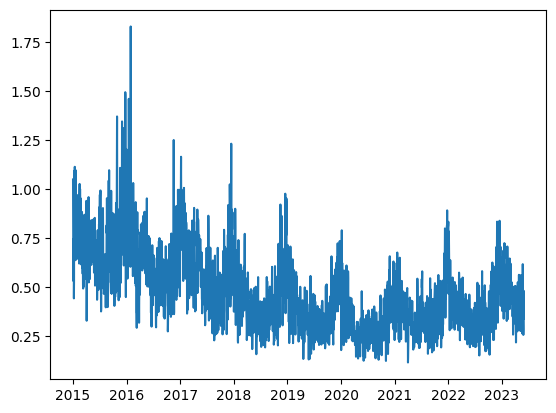

In [32]:
fig, ax = plt.subplots()
ax.plot(df['CO']);

In [33]:
periodos=df['CO']['2018-05' : '2020-05'] #Localiza periodos de tiempo
periodos

,CO
fecha,
2018-05-01,0.248947
2018-05-02,0.451852
2018-05-03,0.425682
2018-05-04,0.457273
2018-05-05,0.239732
...,...
2020-05-27,0.381754
2020-05-28,0.329623
2020-05-29,0.255556


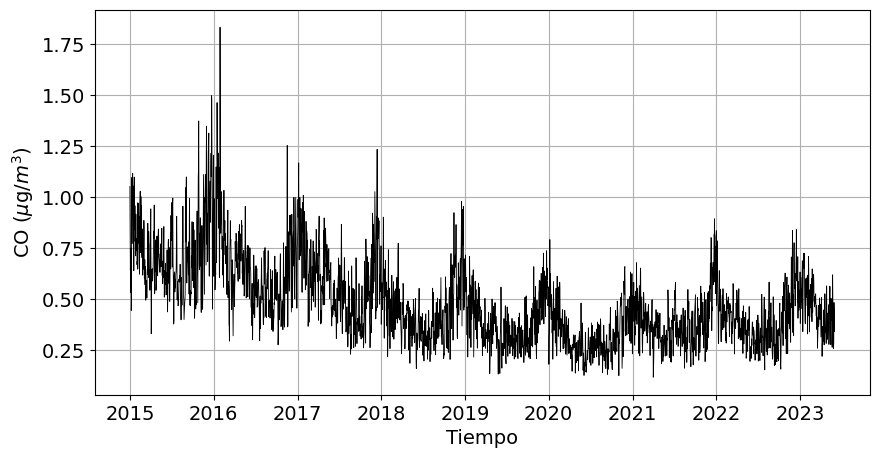

In [35]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['CO'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('CO ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
ax.grid(True)

**Ejercicio:** Realice las gráficas de 2 contaminantes

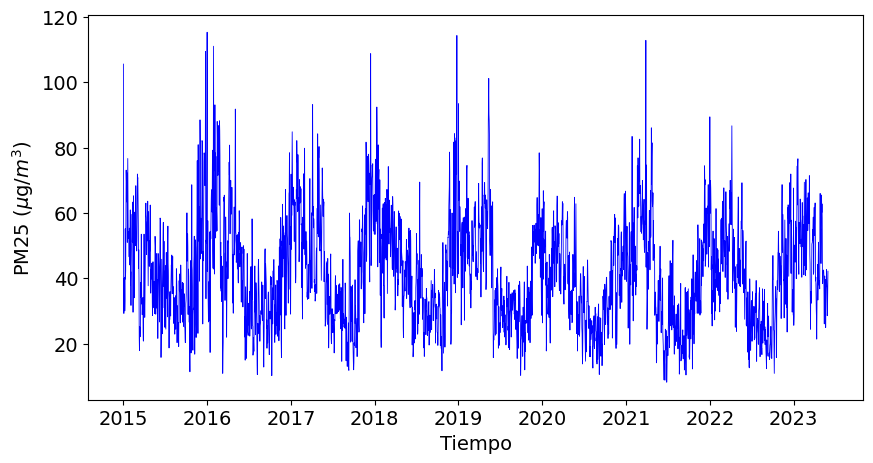

In [37]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100) #Gráfica del contaminente PM10
ax.plot(df['PM10'], color='blue',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('PM25 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });

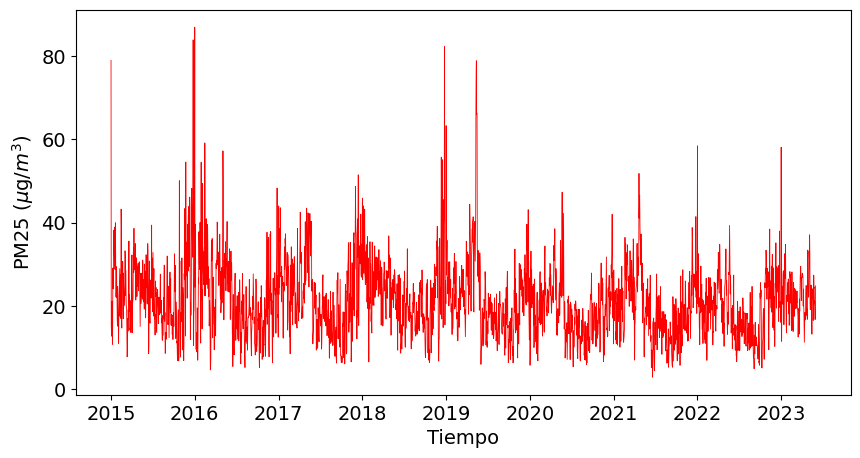

In [38]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100) #Gráfica del contaminente PM25
ax.plot(df['PM25'], color='red',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('PM25 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });

**Ejercicio:** La OMS estableció un nivel recomendado de 25 $\mu$g/$m^3$ (media de 24 horas) para las concentraciones de PM$_{2.5}$. ¿En qué dias se rebasó el nivel recomendado en 2022?

In [40]:
df['PM25']['2022-01-01':'2022-12-31'][df['PM25']>25] #Fechas en que las PM25 pasaron los 25 de concentración

,PM25
fecha,
2022-01-01,58.414835
2022-01-03,28.670588
2022-01-04,32.527687
2022-01-05,27.703125
2022-01-06,25.186747
...,...
2022-12-20,29.639394
2022-12-22,27.008523
2022-12-23,25.591549


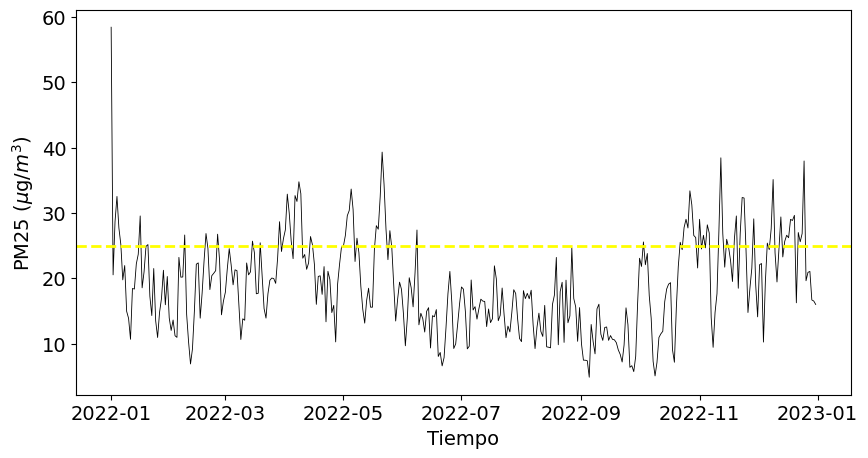

In [42]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)   #Gráfica de los dias en que se rebaso el nivel recomendado
ax.plot(df['PM25']['2022-01-01':'2022-12-31'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('PM25 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
ax.axhline(25,color='yellow',lw=2,linestyle='--')
plt.show()